In [1]:
# Notebook para exploração inicial do dataset "Meteorite Landings"
import pandas as pd
import numpy as np
import math
import seaborn as sns

sns.set_palette('deep')


df1 = pd.read_csv('datasets/meteorite_landings.csv', on_bad_lines='warn') # Dataset 1: Meteorite Landings
df1.head(3) 

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"


## Variável 'mass'

### Boxplot e visualizações da variável 'mass'

- Boxplot 

In [79]:
df1['log mass'] = np.log10(df1['mass']) #criando a escala em log para diminuir a distorção
                                        #ele deu esse erro, mas produziu mesmo assim

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log mass'>

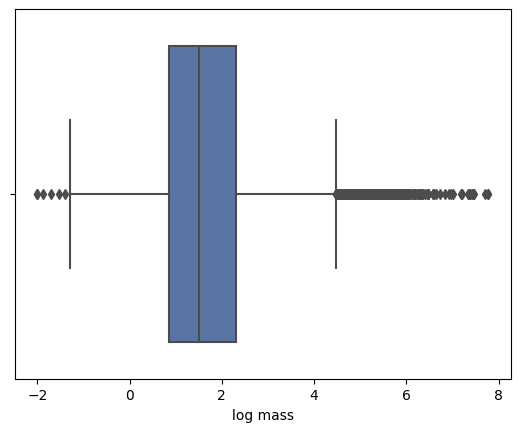

In [80]:

sns.boxplot(df1, x="log mass")


- Histograma


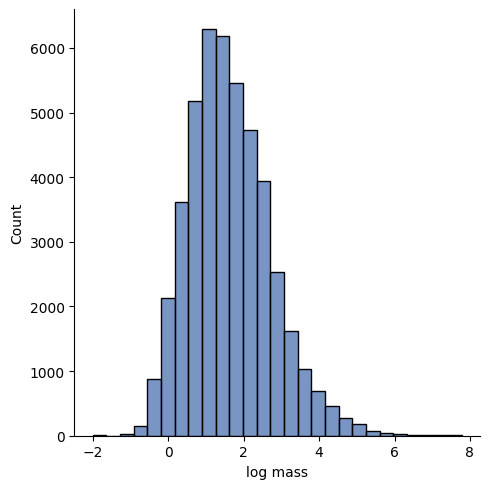

In [81]:
sns.displot(data=df1,x='log mass', bins=27)

## Variável 'year'

- Aqui faremos uma verificação do ano em que o meteorito foi descoberto, pois existem algumas incoerências. 
  
  Faremos essa verificação utilizando como base o site [The Meteoritical Society](https://www.lpi.usra.edu/meteor/metbull.php).
  

In [2]:

years_bug = [i for i in df1['year'] if i >= 2016 or i <= 860 ] # pega os anos incoerentes

index_bug = [i for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega os índices dos elementos problemáticos 

name_years_bug = [df1['name'].loc[i] for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega o nome dos elementos para a verificação no site

print(name_years_bug)
index_bug


['Nogata', 'Havana', 'Northwest Africa 7701', 'Ur', 'Wietrzno-Bobrka']


[703, 16356, 30679, 38188, 38301]

- Agora vamos corrigir as informações no dataframe:

In [3]:
years_bug = [i for i in df1['year'] if i >= 2016 or i <= 860 ] # pega os anos incoerentes

index_bug = [i for i in df1.index if df1.loc[i, 'year'] in years_bug] # pega os índices dos elementos problemáticos 



df1 = df1.drop(index_bug) #removendo os rows em que os anos são problemáticos


### Boxplot e visualizações da variável 'year'

- Histograma 

<Axes: ylabel='Frequency'>

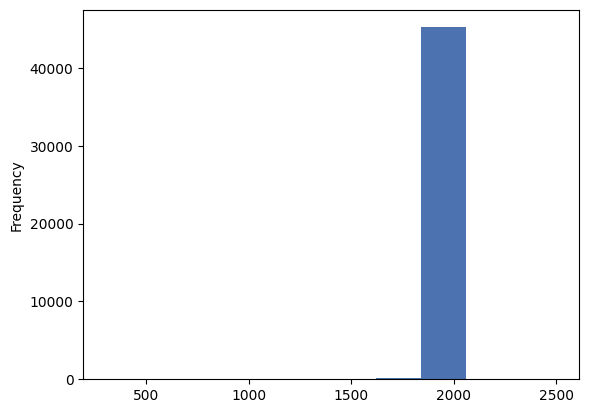

In [82]:
df1['year'].plot.hist()

- Boxplot 

<Axes: xlabel='log year'>

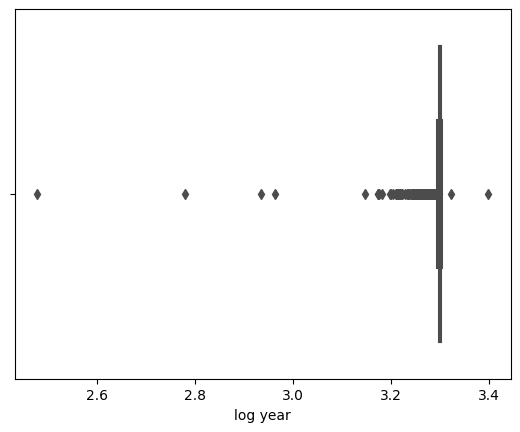

In [83]:
year_copy = (df1[df1['year'] > 0]).copy()

df1['log year'] = np.log10(year_copy['year'])

sns.boxplot(data=df1, x='log year') #utilizando a escala em log


<Axes: xlabel='year'>

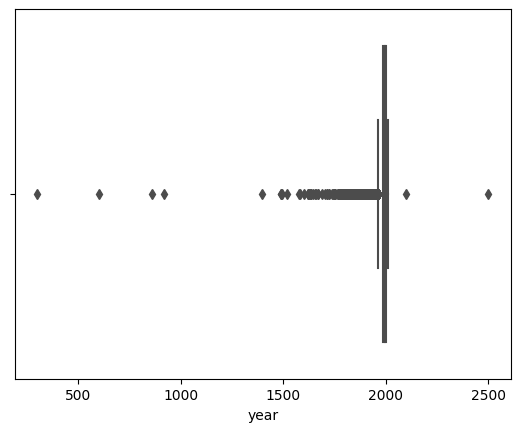

In [84]:
sns.boxplot(data=df1, x='year') #sem utilizar a escala em log

## Medidas de centralidade do Df1

- Medianas

In [6]:
print((df1.sort_values(by='year', ascending=False).dropna()['year']).median()) # mediana de 'year'

print((df1.sort_values(by='mass', ascending=False).dropna()['mass']).median()) # mediana de 'mass'

print((df1.sort_values(by='reclat', ascending=False).dropna()['reclat']).median()) # mediana de 'reclat'

print((df1.sort_values(by='reclong', ascending=False).dropna()['reclong']).median()) # mediana de 'reclong'


1996.0
29.08
-71.5
35.66667


- Médias

In [23]:
df1.mean(numeric_only='True')

id          26889.736628
mass        13278.932641
year         1991.851331
reclat        -39.131696
reclong        61.079448
log year        3.299222
dtype: float64

- Modas

In [24]:
df1.mode(dropna='True')[['mass', 'year', 'fall']].head(1)

,mass,year,fall
0,1.3,2003.0,Found


## Medidas de Dispersão do Df1

- Desvio padrão

In [25]:
df1.std(numeric_only=True).dropna() 


id           16860.791462
mass        575007.788451
year            24.478620
reclat          46.374260
reclong         80.647188
log year         0.005652
dtype: float64

- Variâncias

In [26]:
df1.var(numeric_only=True).dropna()

id          2.842863e+08
mass        3.306340e+11
year        5.992028e+02
reclat      2.150572e+03
reclong     6.503969e+03
log year    3.194326e-05
dtype: float64

## Visualizações do df1

<Axes: >

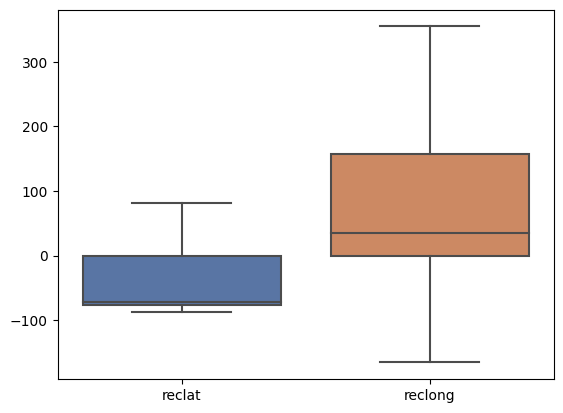

In [85]:
sns.boxplot(data=df1[['reclat', 'reclong']])

#boxplot das variáveis reclat e reclong

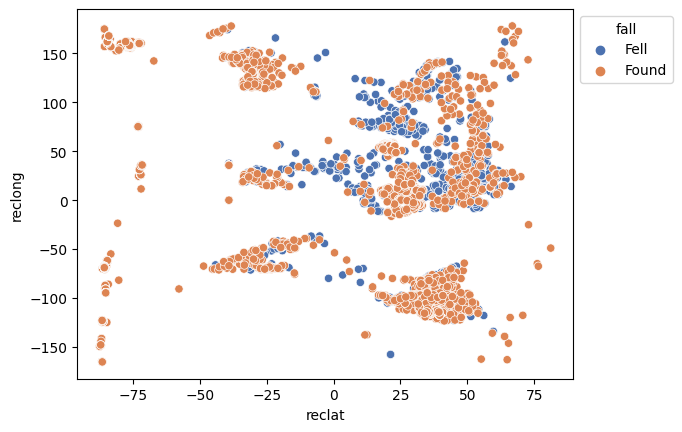

In [4]:
df1['reclong'] = df1['reclong'].map(lambda x : 61.074319 if (x > 180 or x < - 180) else x) #correção de incoerências das colunas 'reclat' e 'reclong'
df1['reclat'] = df1['reclat'].map(lambda x : -39.122580 if (x == 0) else x)

ax = sns.scatterplot(data=df1, x='reclat',y='reclong', hue='fall') # Gráfico exibindo as localizações onde meteoritos caíram e se foram ou não vistos caindo.
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

- Aqui podemos apontar que a maioria dos meteoritos não foram observados durante sua queda, sendo descobertos apenas após encontrarem o solo.

<Axes: >

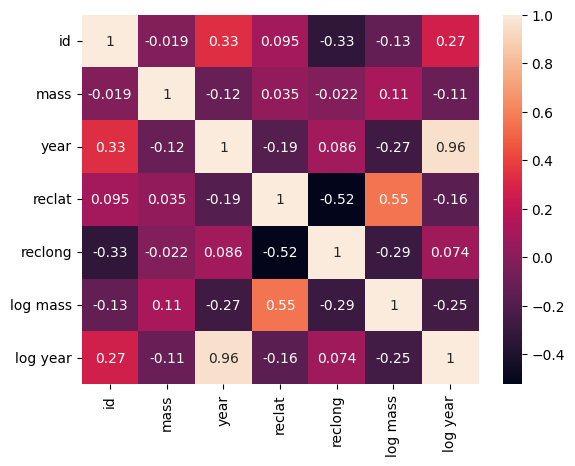

In [87]:
sns.heatmap(df1.corr(numeric_only=True), annot=True) #representação da correlação entre os elementos do df1

<Axes: xlabel='year', ylabel='mass'>

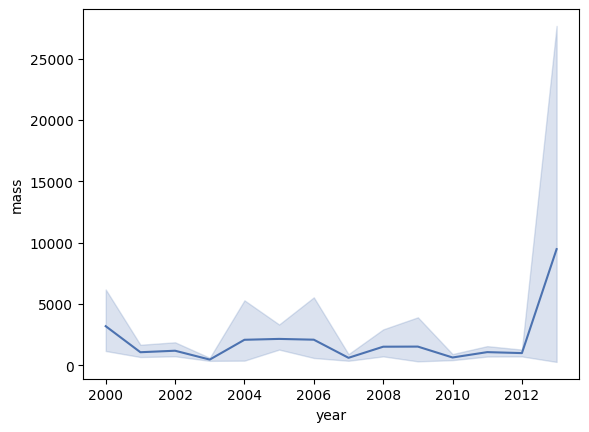

In [24]:
year_cut = df1[df1['year'] >=2000]

sns.lineplot(data=year_cut, x='year', y='mass') #gráfico da variação do tamanho da massa entre os anos 2000

- Notamos aqui um crescimento na massa a partir de anos por volta de 2012

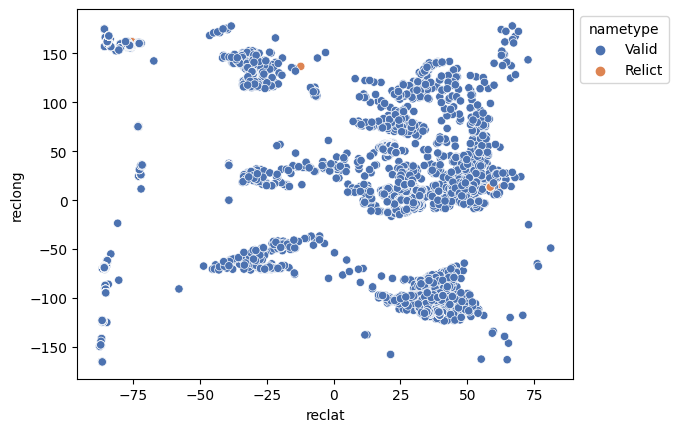

In [56]:
ax = sns.scatterplot(data=df1, x='reclat', y = 'reclong',hue='nametype') # Gráfico exibindo a quantidade de meteoritos e relicto
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

<Axes: xlabel='year', ylabel='year'>

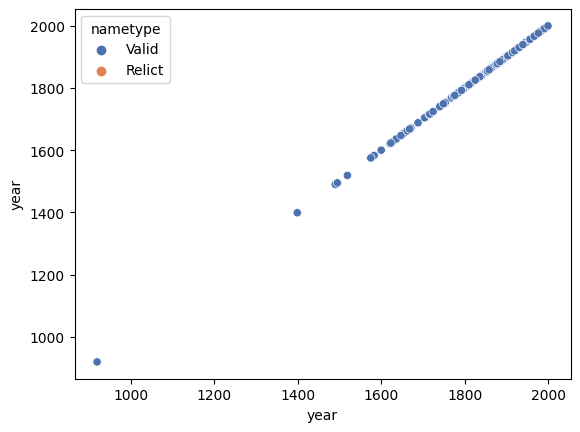

In [55]:
year_cut = df1[df1['year'] < 2000 ]
sns.scatterplot(data=year_cut, x='year',y='year', hue='nametype')

- Com base nos gráficos acima, podemos deduzir que existem pouquíssimos relictos registrados, isto é, objetos altamente alterados que provavelmente possuem origem de meteorito, desgastados pelo clima do planeta terra
        

## Explorando agrupamentos

### Explorando agrupamentos das variáveis 'mass' e 'year'

In [7]:
from sklearn.cluster import KMeans

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='year', ylabel='mass'>

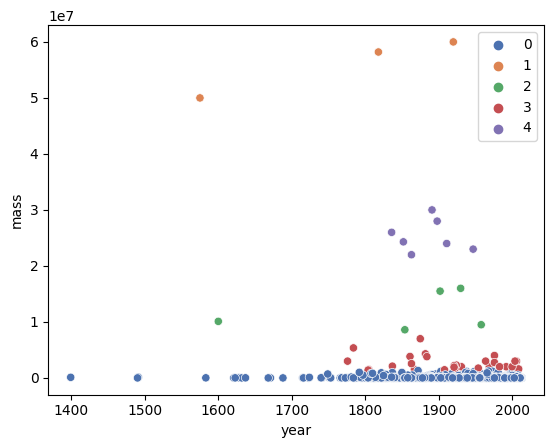

In [9]:

df_group = df1[['mass', 'year']].dropna()

kmeans1 = KMeans(n_clusters=5)

kmeans1.fit(df_group)

sns.scatterplot(data=df_group, x='year',y = 'mass', hue=kmeans1.labels_, palette='deep')



c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='year', ylabel='mass'>

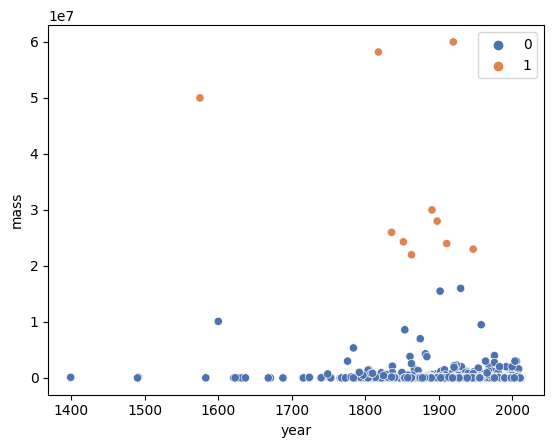

In [10]:
kmeans2 = KMeans(n_clusters=2)

kmeans2.fit(df_group)

sns.scatterplot(data=df_group, x='year',y = 'mass', hue=kmeans2.labels_, palette='deep')

- "Elbow method"

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[]

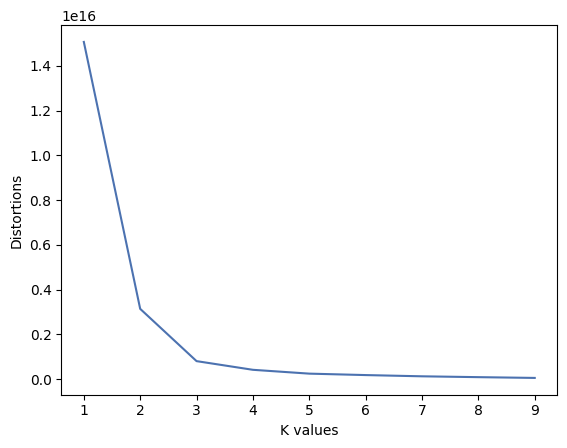

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_group)                         #Pega as distorções para cada valor de K no range(1,10), armazenando-as em uma lista
    distortions.append(kmeanModel.inertia_)


k_graph = sns.lineplot(x=K, y=distortions)           #aqui visualizamos o gráfico para achar o melhor valor para K
k_graph.set(xlabel='K values', ylabel="Distortions")

k_graph.plot

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


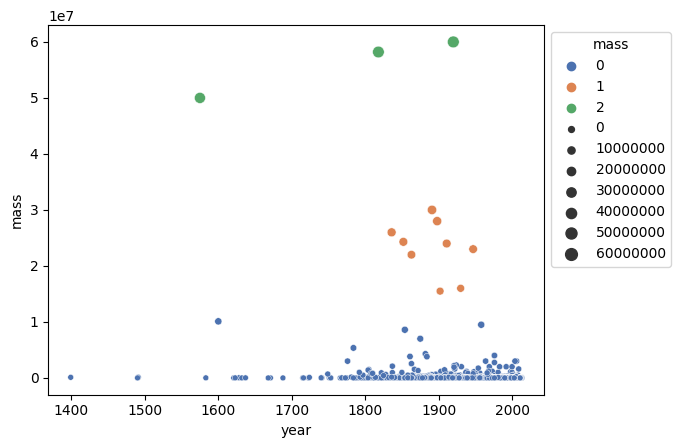

In [75]:

kmeans3 = KMeans(n_clusters=3)

kmeans3.fit(df_group)

plot3 = sns.scatterplot(data=df_group, x= 'year',y = 'mass', hue=kmeans3.labels_, palette="deep", size='mass')

sns.move_legend(plot3, "upper left", bbox_to_anchor=(1,1))

#### Com base nas diferentes visualizações , podemos fazer algumas observações:
- Existe uma enorme concentração de meteoritos com massas extremamente pequenas.
- O valor K = 3, obtido pelo "Elbow method", se mostrou o mais equilibrado para a visualização dos dados.

## Explorando agrupamentos das variáveis 'reclat' e 'reclong'

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


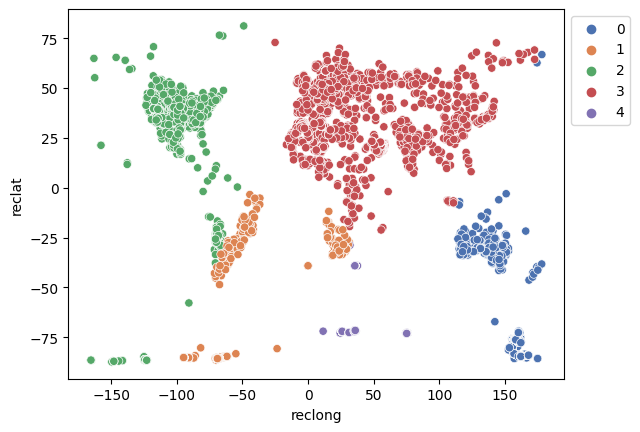

In [58]:
df_group = df1[['reclat', 'reclong']].dropna()

kmeans4 = KMeans(n_clusters=5)

kmeans4.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'reclong',y = 'reclat', hue=kmeans4.labels_, palette="deep")

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))





c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


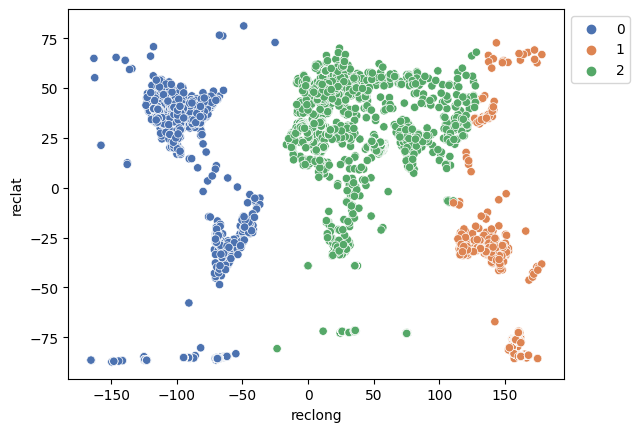

In [112]:
kmeans4 = KMeans(n_clusters=3)

kmeans4.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'reclong',y = 'reclat', hue=kmeans4.labels_, palette="deep")

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))


c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


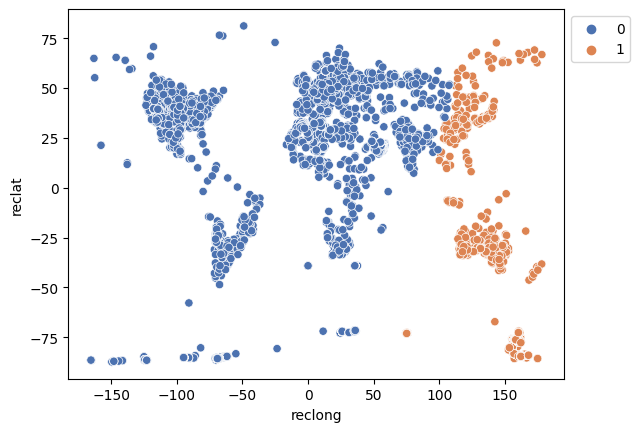

In [113]:
kmeans4 = KMeans(n_clusters=2)

kmeans4.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'reclong',y = 'reclat', hue=kmeans4.labels_, palette="deep")

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))


- "Elbow method"

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[]

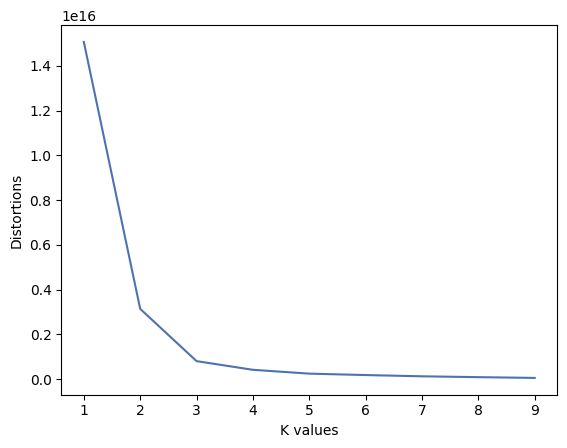

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_group)                         #Pega as distorções para cada valor de K no range(1,10), armazenando-as em uma lista
    distortions.append(kmeanModel.inertia_)


k_graph = sns.lineplot(x=K, y=distortions)           #aqui visualizamos o gráfico para achar o melhor valor para K
k_graph.set(xlabel='K values', ylabel="Distortions")

k_graph.plot()

c:\Users\biabc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


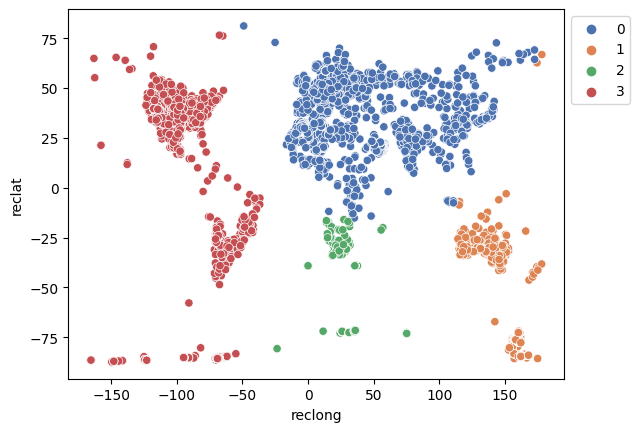

In [62]:
kmeans4 = KMeans(n_clusters=4)

kmeans4.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'reclong',y = 'reclat', hue=kmeans4.labels_, palette="deep")

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))


#### Com base nas diferentes visualizações , podemos fazer algumas observações:
- A maioria dos meteoritos caíram ou foram encontrados em latitudes baixas.
- O valor K = 4, obtido pelo "Elbow method", se mostrou o mais equilibrado para a visualização dos dados.
- Os meteoritos se espalham pelo mundo todo.

## A partir dos agrupamentos surgem algumas perguntas:
- Estaria a localização geográfica relacionada com a massa do meteorito? e o ano estaria relacionado com a massa também?
- Quais os fatores que levam a concentração de massas pequenas nos meteoritos registrados?